In [32]:
# First things first
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

In [33]:
border_crossing_full = pd.read_csv('data/Border_Crossing_Entry_Data.csv')

In [34]:
border_crossing_full.shape

(380467, 10)

In [35]:
replace_dict = {'Border':{'US-Canada Border':'USCA','US-Mexico Border':'USMX'}}

border_crossing_full = border_crossing_full.replace(replace_dict)
border_crossing_full[['Month','Year']] = border_crossing_full['Date'].str.split(" ",expand=True)
border_crossing_full = border_crossing_full.drop(['Port Name','Point','Date'],axis=1)
coordless_border_crossing = border_crossing_full.drop(['Latitude','Longitude'],axis=1)


<AxesSubplot: xlabel='Year', ylabel='Value'>

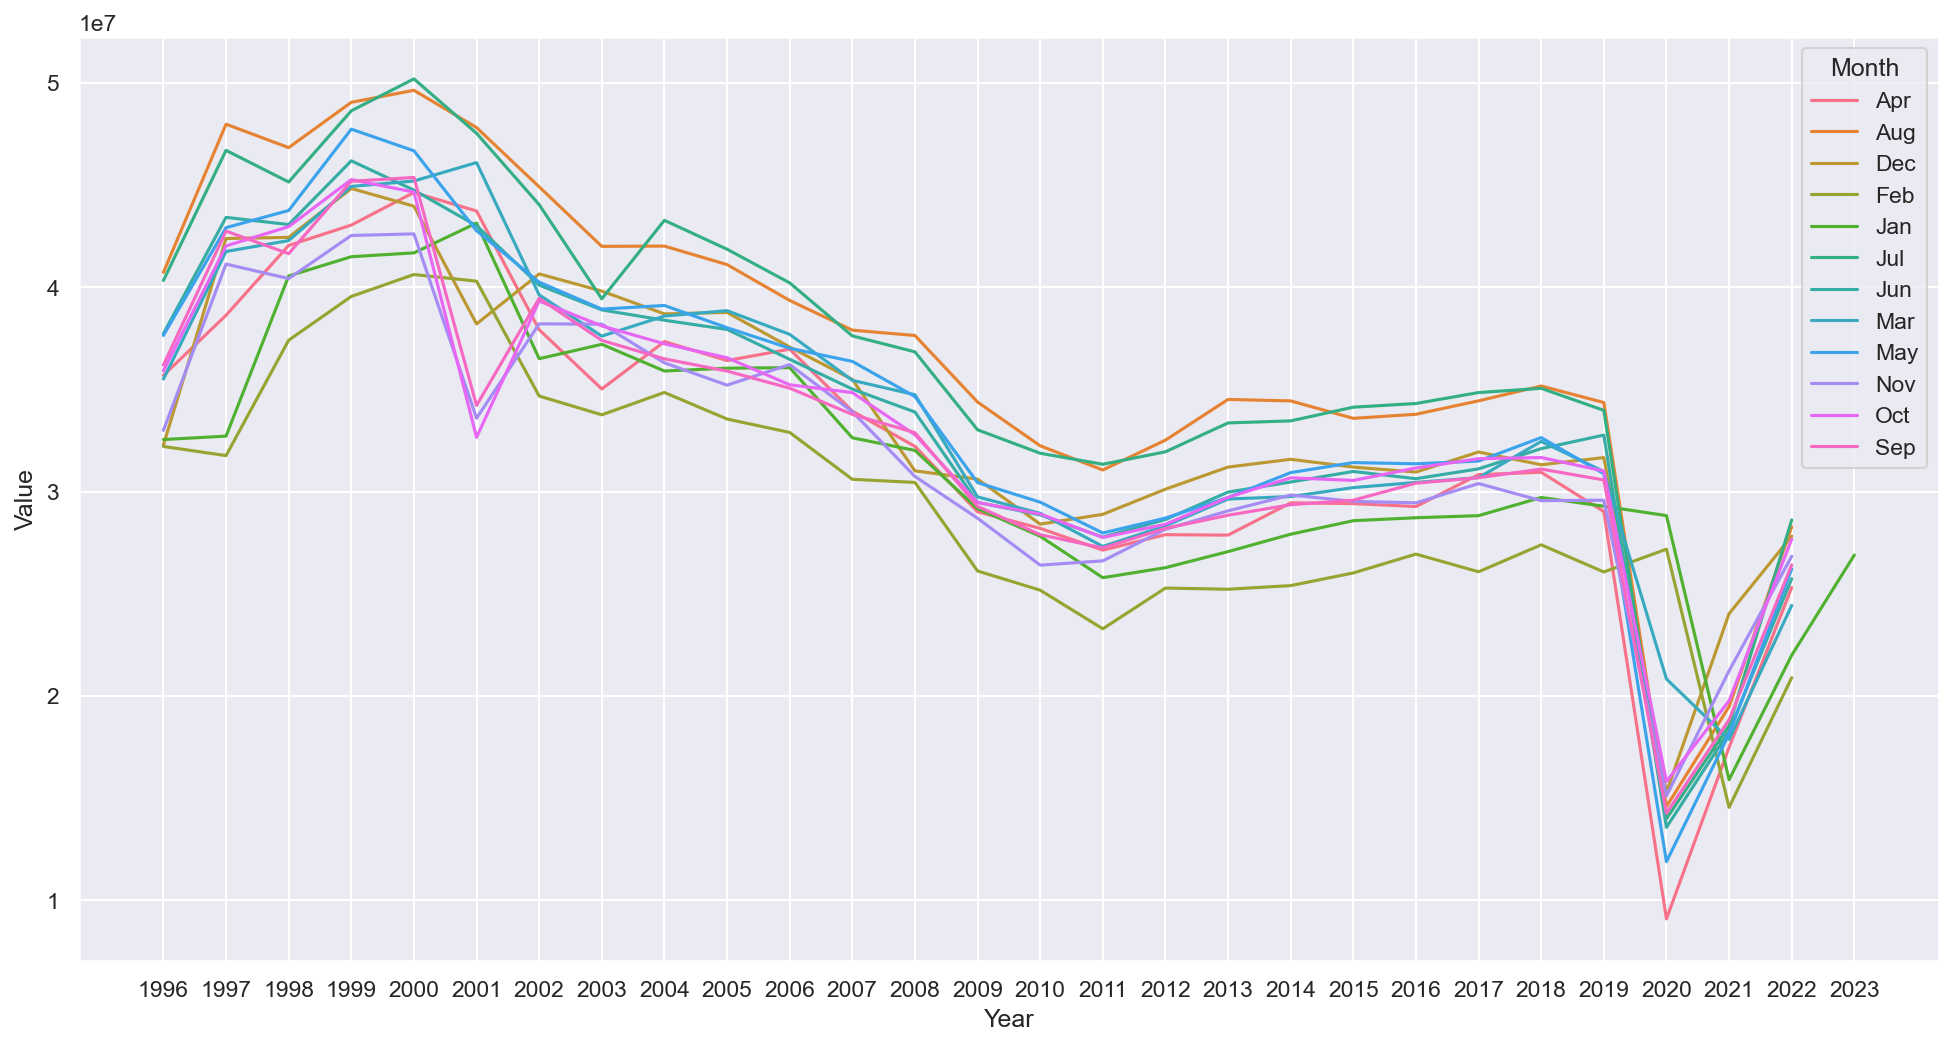

In [41]:
yearly_activity = border_crossing_full[['Month','Year','Value']].groupby(['Year','Month']).agg(sum)
sns.lineplot(yearly_activity,x='Year',y='Value',hue='Month')

#groupedState = coordless_border_crossing.groupby('State').agg('first')
#groupedState.head(15)